In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

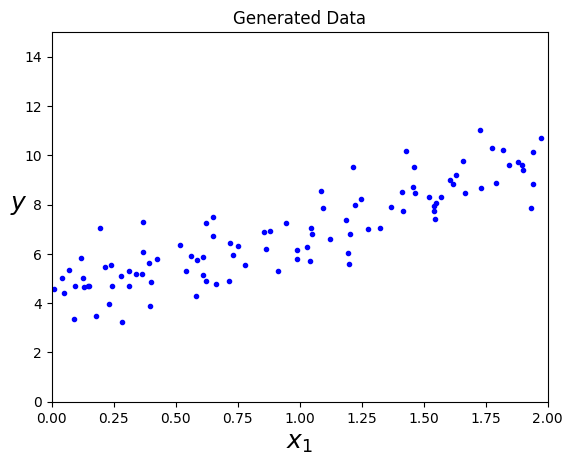

In [3]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.title("Generated Data")
plt.show()

### Batch Gradient Descent

In [4]:
X_b = np.c_[np.ones((100, 1)), X]  # Add bias term
m = len(X_b)
eta = 0.1  # Learning rate
n_iterations = 1000

theta = np.random.randn(2, 1)  # Random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
print("Batch Gradient Descent theta:", theta)

Batch Gradient Descent theta: [[4.21509616]
 [2.77011339]]


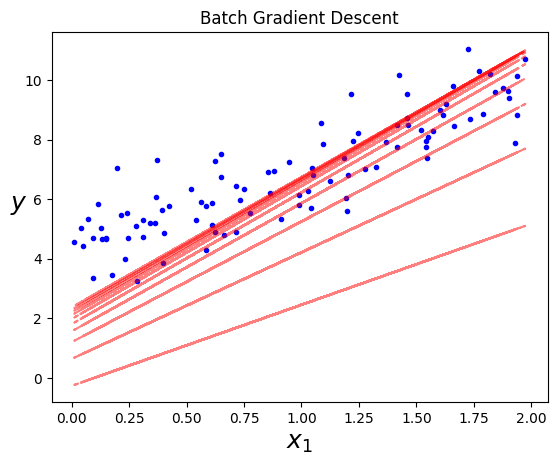

In [5]:
# Plot Gradient Descent Effect
plt.plot(X, y, "b.")
def plot_gradient_descent(theta, eta):
    for _ in range(10):
        plt.plot(X, X_b.dot(theta), "r--", alpha=0.5)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
plot_gradient_descent(np.random.randn(2, 1), eta=0.1)
plt.title("Batch Gradient Descent")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

### Stochastic Gradient Descent

In [6]:
np.random.seed(42)
theta = np.random.randn(2, 1)  # Random initialization
n_epochs = 50
t0, t1 = 5, 50  # Learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
print("Stochastic Gradient Descent theta:", theta)

Stochastic Gradient Descent theta: [[4.21076011]
 [2.74856079]]


### Mini-Batch Gradient Descent

In [7]:
np.random.seed(42)
n_iterations = 50
minibatch_size = 20
theta = np.random.randn(2, 1)  # Random initialization
t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
print("Mini-Batch Gradient Descent theta:", theta)

Mini-Batch Gradient Descent theta: [[4.18223159]
 [2.79659366]]


### Normal Equation

In [8]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print("Normal Equation theta:", theta_best)

Normal Equation theta: [[4.21509616]
 [2.77011339]]


### Ridge, Lasso, ElasticNet

In [9]:
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
print("Ridge Regression:", ridge_reg.intercept_, ridge_reg.coef_)

lasso_reg = Lasso(alpha=0.1, random_state=42)
lasso_reg.fit(X, y)
print("Lasso Regression:", lasso_reg.intercept_, lasso_reg.coef_)

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
print("Elastic Net Regression:", elastic_net.intercept_, elastic_net.coef_)

Ridge Regression: [4.28736241] [[2.69326395]]
Lasso Regression: [4.48341837] [2.48477396]
Elastic Net Regression: [4.65774601] [2.29939031]


### Learning Curves

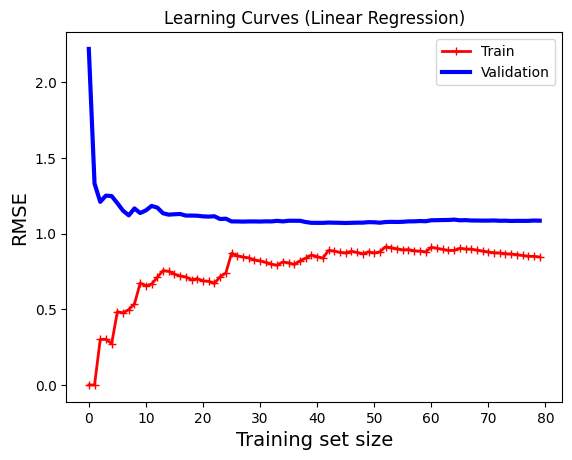

In [10]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation")
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)
    plt.legend()

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.title("Learning Curves (Linear Regression)")
plt.show()

### Polynomial Learning Curves

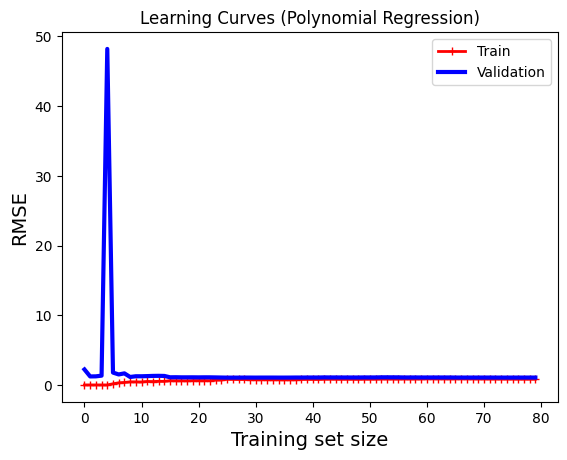

In [14]:
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=4, include_bias=False)),
    ("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)
plt.title("Learning Curves (Polynomial Regression)")
plt.show()

### Regression vs Classification

/Users/yaheaal/Desktop/machine-learning-with-qafzah/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


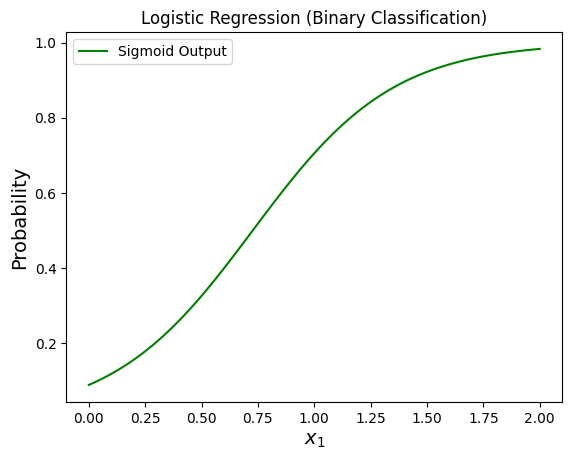

In [15]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X, (y > 6).astype(int))  # Example classification problem

x_test = np.linspace(0, 2, 100).reshape(-1, 1)
pred_proba = log_reg.predict_proba(x_test)[:, 1]
plt.plot(x_test, pred_proba, "g-", label="Sigmoid Output")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.title("Logistic Regression (Binary Classification)")
plt.legend()
plt.show()

### Multiclass Classification (Softmax)

In [17]:
from sklearn.linear_model import LogisticRegression

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
y_multiclass = np.random.randint(0, 3, size=(100,))  # Generate multiclass targets
softmax_reg.fit(X, y_multiclass)
print("Softmax Coefficients:", softmax_reg.coef_)
print("Softmax Intercept:", softmax_reg.intercept_)

Softmax Coefficients: [[ 0.22654954]
 [ 0.32516496]
 [-0.5517145 ]]
Softmax Intercept: [-0.29950284 -0.27632394  0.57582678]


/Users/yaheaal/Desktop/machine-learning-with-qafzah/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [18]:
sample_index = 0  # Choose any sample
proba = softmax_reg.predict_proba(X[sample_index:sample_index + 1])
print(f"Predicted probabilities for sample {sample_index}:", proba)
print("Sum of probabilities:", np.sum(proba))

Predicted probabilities for sample 0: [[0.29057236 0.32018611 0.38924153]]
Sum of probabilities: 1.0
